In [11]:
import pandas as pd

import matplotlib.pyplot as plt

In [12]:
housing_data = pd.read_csv('housing/housing.csv')

housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
15268,-117.33,33.03,31.0,1171.0,321.0,603.0,267.0,2.8611,314300.0,NEAR OCEAN
871,-122.07,37.52,3.0,14014.0,2861.0,7205.0,2753.0,6.0824,273500.0,NEAR BAY
15610,-116.87,32.72,13.0,3268.0,491.0,1431.0,503.0,5.7652,259900.0,<1H OCEAN
16668,-120.69,35.25,15.0,4210.0,899.0,1933.0,867.0,2.7940,262500.0,NEAR OCEAN
11864,-121.23,40.29,21.0,3229.0,667.0,1501.0,582.0,2.1524,77100.0,INLAND


In [13]:
housing_data.shape

(20640, 10)

In [16]:
housing_data = housing_data.dropna() # clean up records with missing fields

In [17]:
housing_data.shape

(20433, 10)

In [19]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [20]:
# Results of this linear regression could look skewed because there are about a 1000 records 
# that are above 500,000 USD in value. So, it'd be advisable to drop them to avoid skewed results.

# first we are calculating the index positions of all the records with median value of 500001
housing_data = housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)


In [21]:
housing_data.shape

(19475, 10)

In [22]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [23]:
# Another observation that can be drawn from the above table is that, except for 'ocean_proximity' column, 
# all others are numeric. And since machine learning models can only work with numerical values, we have a
# responsibility to convert them/map the string values to numerical values

housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [24]:
# one-hot encoding is a most common way to convert
housing_data = pd.get_dummies(housing_data, columns=['ocean_proximity'])
# the 'get_dummies' will convert the strings to one-hot form and remove the original column from the table

In [25]:
housing_data.shape

(19475, 14)

In [26]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
8518,-118.32,33.89,44.0,1300.0,252.0,695.0,249.0,5.1669,220600.0,1,0,0,0,0
10051,-121.00,39.16,10.0,1170.0,225.0,537.0,194.0,3.2813,163200.0,0,1,0,0,0
12052,-117.57,33.87,33.0,2076.0,517.0,1374.0,480.0,2.2197,138200.0,0,1,0,0,0
11637,-118.03,33.83,25.0,768.0,195.0,529.0,184.0,3.1750,132800.0,1,0,0,0,0
1082,-121.84,39.73,52.0,857.0,232.0,520.0,198.0,0.9870,112500.0,0,1,0,0,0


In [27]:
X = housing_data.drop('median_house_value', axis=1) # features
Y = housing_data['median_house_value'] # target

In [29]:
X.columns # you can note in the list of columns below that, 'median_house_value' is dropped

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [30]:
# It is a common practice when training the ML model to split the dataset into train and test sets
# training set: dataset used to train the model parameters, to build the model
# testing set: subset of the dataset, that you'll hold onto without changing to test the model in the end.
#              You'll not show this dataset to the model while training to prevent any bias/erroneous results
# test set is used to measure how well the trained model performs on instances it has never seen before

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) # usually it is an 80/20 split

In [31]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

In [32]:
y_train.shape, y_test.shape

((15580,), (3895,))

In [33]:
from sklearn.linear_model import LinearRegression

# LinearRegression object is instantiated, from the sklearn library. It is easy to train ML models using skLearn
# library because of that. Normalization scales all numeric features to be between 0 and 1.
# Having features in the same scale can vastly improve the performance of your ML model
# You can see how easy it is to normaliza the data when using a LinearRegression estimator. You are just specifying
# it as True. This is part of the preprocessing step.

# Fit function: fits the linear model on the training data, i.e. train the linear model using our features and 
# target values
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)


In [34]:
# since the dataset is fairly smaller, scikit-learn trains the model quickly
print("Training score : ", linear_model.score(x_train, y_train))

Training score :  0.6094464340048867


In [35]:
# Once you have a fully-trained model, the score function allows you to evaluate this model on different kinds of
# data we have.
# This score is R-square: and R-square is a measure of how well our linear model captures the underlying variation
# in our training data

# A training score of ~61% means indicates that, our linear model captured 60% of the variations in our training
# data. It isn't great, but not too bad.

predictors = x_train.columns

predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [36]:
# The formula to represent a linear model is of the form y = mx + c which is the equation of a straight line
# and x represents our features

coef = pd.Series(linear_model.coef_, predictors).sort_values()

print(coef)

ocean_proximity_INLAND        -26063.257041
longitude                     -24073.360334
latitude                      -22315.858542
population                       -30.898465
total_rooms                       -6.785534
households                        39.322996
total_bedrooms                    96.246529
housing_median_age               947.219398
ocean_proximity_NEAR BAY        7624.281220
ocean_proximity_<1H OCEAN      13236.712444
ocean_proximity_NEAR OCEAN     15708.207236
median_income                  38099.654618
ocean_proximity_ISLAND        177608.694016
dtype: float64


In [37]:
# The coefficients can be understood as the weight. The weight/influence that feature contributed towards the
# prediction. Negative values above indicate that these are the values that influence inversely on the house value

# for example, here if the house is inland, too far away from the ocean, price drops
# same when population is more in the area, house price drops
# But the positive values affect the median house value positively

# You can notice that the highest coefficient is 'ocean_proximity_ISLAND', which means the most expensive houses 
# are located on an island. Also, higher the 'median_income' in an area drives the prices of the homes further
# and near the bay or less than 1 hr from ocean also affects the increase in price.


In [38]:
# Now let's use this model to try and predict the price of a home using the test set

y_pred = linear_model.predict(x_test)

In [39]:
df_pred_actual = pd.DataFrame({'predicted': y_pred, 'actual': y_test})

df_pred_actual.head(10)

,predicted,actual
17532,131785.324065,350000.0
9160,249228.479907,199600.0
19934,104350.343200,88900.0
20230,256942.334299,395500.0
5162,124960.474261,89700.0
8981,202942.533259,325000.0
4420,172332.027182,181700.0
9761,278265.211157,274600.0
4918,133909.729708,104200.0
1387,309278.325183,294100.0


In [40]:
# Eyeballing the data is good, but the best way to evaluate a model is to calculate the R square score on your 
# test data.

from sklearn.metrics import r2_score

print("Testing score : ", r2_score(y_test, y_pred))

Testing score :  0.6266592678782519


In [41]:
# R square score on your test data is almost close to the R square score on your training data

# Training score :  0.6094464340048867
# Testing score :  0.6266592678782519

# This means that, the model is performing as good on the test data as it does on the training data


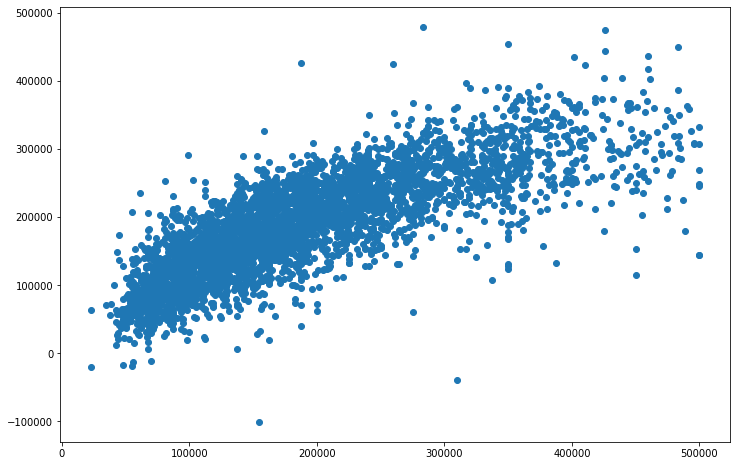

In [42]:
fig, ax = plt.subplots(figsize=(12,8))

plt.scatter(y_test, y_pred)
plt.show()

In [48]:
# R square value is an objective measure of your model performance, but visualizations give you a big picture feel
# for how your model works

# Now, since our test data set contains nearly ~4000 records, and I am sampling 100 of these predictions vs. actual
# values from the original data frame

df_pred_actual_sample = df_pred_actual.sample(100)
df_pred_actual_sample = df_pred_actual_sample.reset_index() # to start the index position at 0

In [49]:
df_pred_actual_sample.head()

,index,predicted,actual
0,1674,184421.454394,134500.0
1,3498,202765.801131,185800.0
2,14502,291611.941983,196800.0
3,2714,85957.566466,67500.0
4,20040,95150.830886,63900.0


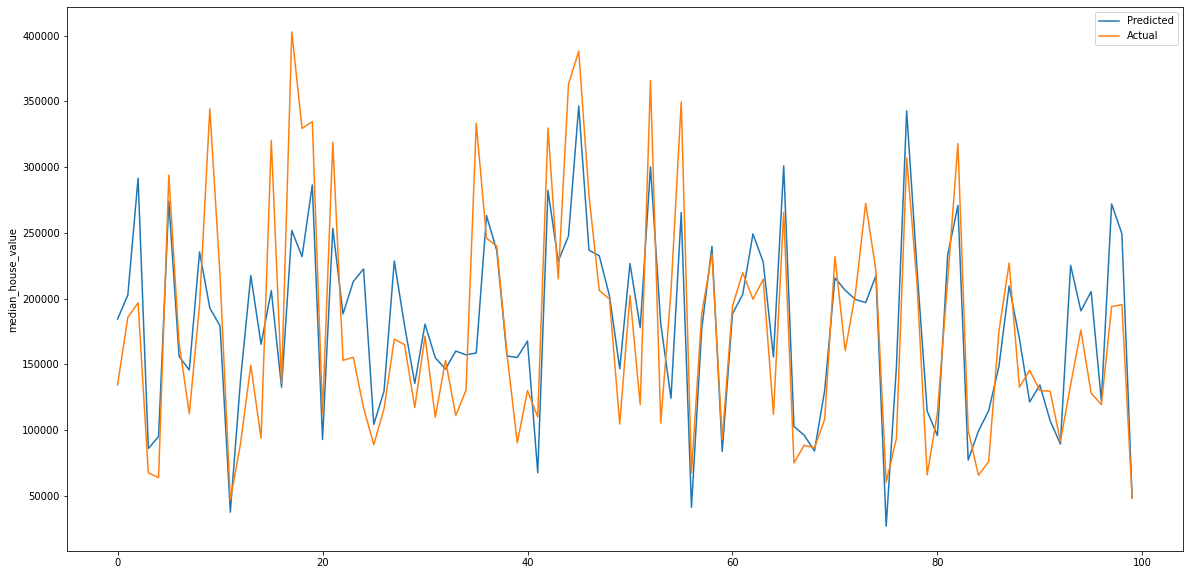

In [50]:
plt.figure(figsize = (20, 10))

plt.plot(df_pred_actual_sample['predicted'], label='Predicted')
plt.plot(df_pred_actual_sample['actual'], label='Actual')

plt.ylabel('median_house_value')

plt.legend()
plt.show()